# Unit 3 Capstone 

In [453]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KDTree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

## The Dataset

This data can be found on Kaggle https://www.kaggle.com/passnyc/data-science-for-good#2016%20School%20Explorer.csv and was provided by PASSNYC. The dataset includes 1272 schools in the New York City area. The purpose for the data is to find the schools that need the most attention. The test scores are from a test called SHSAT, which is a high school admission examination given to student before acceptance into one of the city's specialized high schools among the eight that require this test. This test is only given to eighth and nineth grade students. Only students that wish to attend the more prestigious more specialized schools will have to take the SHSAT. I also one to mention that the definition used for rigorous instruction is a little different from how I would normally use it and I wanted to clarify their definition. The school dataset provider's definition for rigorous instruction is how well the students were engaged during the curriculum.

In [2]:
df = pd.read_csv('2016 School Explorer.csv')

## Exploring the dataset

In [3]:
for col in df.columns:
    print("'" + col + "',")

'Adjusted Grade',
'New?',
'Other Location Code in LCGMS',
'School Name',
'SED Code',
'Location Code',
'District',
'Latitude',
'Longitude',
'Address (Full)',
'City',
'Zip',
'Grades',
'Grade Low',
'Grade High',
'Community School?',
'Economic Need Index',
'School Income Estimate',
'Percent ELL',
'Percent Asian',
'Percent Black',
'Percent Hispanic',
'Percent Black / Hispanic',
'Percent White',
'Student Attendance Rate',
'Percent of Students Chronically Absent',
'Rigorous Instruction %',
'Rigorous Instruction Rating',
'Collaborative Teachers %',
'Collaborative Teachers Rating',
'Supportive Environment %',
'Supportive Environment Rating',
'Effective School Leadership %',
'Effective School Leadership Rating',
'Strong Family-Community Ties %',
'Strong Family-Community Ties Rating',
'Trust %',
'Trust Rating',
'Student Achievement Rating',
'Average ELA Proficiency',
'Average Math Proficiency',
'Grade 3 ELA - All Students Tested',
'Grade 3 ELA 4s - All Students',
'Grade 3 ELA 4s - American Indian

In [4]:
df.shape

(1272, 161)

In [5]:
len((df['City'].unique()))

45

In [6]:
len((df['Zip'].unique()))

169

In [7]:
df.head()

,Adjusted Grade,New?,Other Location Code in LCGMS,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full),...,Grade 8 Math - All Students Tested,Grade 8 Math 4s - All Students,Grade 8 Math 4s - American Indian or Alaska Native,Grade 8 Math 4s - Black or African American,Grade 8 Math 4s - Hispanic or Latino,Grade 8 Math 4s - Asian or Pacific Islander,Grade 8 Math 4s - White,Grade 8 Math 4s - Multiracial,Grade 8 Math 4s - Limited English Proficient,Grade 8 Math 4s - Economically Disadvantaged
0,NaN,NaN,NaN,P.S. 015 ROBERTO CLEMENTE,310100010015,01M015,1,40.721834,-73.978766,"333 E 4TH ST NEW YORK, NY 10009",...,0,0,0,0,0,0,0,0,0,0
1,NaN,NaN,NaN,P.S. 019 ASHER LEVY,310100010019,01M019,1,40.729892,-73.984231,"185 1ST AVE NEW YORK, NY 10003",...,0,0,0,0,0,0,0,0,0,0
2,NaN,NaN,NaN,P.S. 020 ANNA SILVER,310100010020,01M020,1,40.721274,-73.986315,"166 ESSEX ST NEW YORK, NY 10002",...,0,0,0,0,0,0,0,0,0,0
3,NaN,NaN,NaN,P.S. 034 FRANKLIN D. ROOSEVELT,310100010034,01M034,1,40.726147,-73.975043,"730 E 12TH ST NEW YORK, NY 10009",...,48,1,0,0,0,0,0,0,0,0
4,NaN,NaN,NaN,THE STAR ACADEMY - P.S.63,310100010063,01M063,1,40.724404,-73.986360,"121 E 3RD ST NEW YORK, NY 10009",...,0,0,0,0,0,0,0,0,0,0


In [8]:
df['Grades'].head()

0             PK,0K,01,02,03,04,05
1             PK,0K,01,02,03,04,05
2             PK,0K,01,02,03,04,05
3    PK,0K,01,02,03,04,05,06,07,08
4             PK,0K,01,02,03,04,05
Name: Grades, dtype: object

In [9]:
df['Grade Low'].head()

0    PK
1    PK
2    PK
3    PK
4    PK
Name: Grade Low, dtype: object

In [10]:
df[['Grade High', 'Average ELA Proficiency', 'Average Math Proficiency']].head()

,Grade High,Average ELA Proficiency,Average Math Proficiency
0,05,2.14,2.17
1,05,2.63,2.98
2,05,2.39,2.54
3,08,2.48,2.47
4,05,2.38,2.54


In [11]:
df.describe()

,SED Code,District,Latitude,Longitude,Zip,Economic Need Index,Average ELA Proficiency,Average Math Proficiency,Grade 3 ELA - All Students Tested,Grade 3 ELA 4s - All Students,...,Grade 8 Math - All Students Tested,Grade 8 Math 4s - All Students,Grade 8 Math 4s - American Indian or Alaska Native,Grade 8 Math 4s - Black or African American,Grade 8 Math 4s - Hispanic or Latino,Grade 8 Math 4s - Asian or Pacific Islander,Grade 8 Math 4s - White,Grade 8 Math 4s - Multiracial,Grade 8 Math 4s - Limited English Proficient,Grade 8 Math 4s - Economically Disadvantaged
count,1.272000e+03,1272.00000,1272.000000,1272.000000,1272.000000,1247.000000,1217.000000,1217.000000,1272.000000,1272.000000,...,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000
mean,3.286698e+11,16.13522,40.734537,-73.918347,10815.720912,0.672281,2.534215,2.668956,60.569182,4.952830,...,43.841195,4.911950,0.003145,0.610063,0.947327,1.984277,0.970912,0.002358,0.159591,2.992138
std,1.222022e+10,9.24527,0.086602,0.080576,529.588875,0.210959,0.363589,0.470470,57.872496,8.300568,...,82.878780,20.792371,0.068635,3.966083,4.056007,12.841333,6.880223,0.084116,1.321195,12.694124
min,3.075000e+11,1.00000,40.507803,-74.244025,10001.000000,0.049000,1.810000,1.830000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.208752e+11,9.00000,40.669499,-73.957057,10452.000000,0.550000,2.250000,2.300000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.315004e+11,15.00000,40.722995,-73.920571,11203.000000,0.731000,2.450000,2.580000,54.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.424000e+11,24.00000,40.815632,-73.879264,11232.000000,0.841000,2.760000,2.980000,94.000000,7.000000,...,59.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.531009e+11,32.00000,40.903455,-73.708920,11694.000000,0.957000,3.930000,4.200000,356.000000,55.000000,...,652.000000,312.000000,2.000000,107.000000,71.000000,246.000000,126.000000,3.000000,33.000000,196.000000


In [12]:
null_count = df.isnull().sum()
null_count[null_count>0]

Adjusted Grade                            1270
New?                                      1245
Other Location Code in LCGMS              1271
Economic Need Index                         25
School Income Estimate                     396
Student Attendance Rate                     25
Percent of Students Chronically Absent      25
Rigorous Instruction %                      25
Rigorous Instruction Rating                 76
Collaborative Teachers %                    25
Collaborative Teachers Rating               76
Supportive Environment %                    25
Supportive Environment Rating               80
Effective School Leadership %               25
Effective School Leadership Rating          73
Strong Family-Community Ties %              25
Strong Family-Community Ties Rating         73
Trust %                                     25
Trust Rating                                73
Student Achievement Rating                  86
Average ELA Proficiency                     55
Average Math 

In [13]:
selected_columns = ['Zip',
'Grades',
'Community School?',
'Economic Need Index',
'Percent ELL',
'Percent Asian',
'Percent Black',
'Percent Hispanic',
'Percent Black / Hispanic',
'Percent White',
'Student Attendance Rate',
'Percent of Students Chronically Absent',
'Rigorous Instruction %',
'Rigorous Instruction Rating',
'Collaborative Teachers %',
'Collaborative Teachers Rating',
'Supportive Environment %',
'Supportive Environment Rating',
'Effective School Leadership %',
'Effective School Leadership Rating',
'Strong Family-Community Ties %',
'Strong Family-Community Ties Rating',
'Trust %',
'Trust Rating',
'Student Achievement Rating',
'Average ELA Proficiency',
'Average Math Proficiency',
'Grade 3 ELA - All Students Tested',
'Grade 3 Math - All Students tested',
'Grade 4 ELA - All Students Tested',
'Grade 4 Math - All Students Tested',
'Grade 5 ELA - All Students Tested',
'Grade 5 Math - All Students Tested',
'Grade 6 ELA - All Students Tested',
'Grade 6 Math - All Students Tested',
'Grade 7 ELA - All Students Tested',
'Grade 7 Math - All Students Tested',
'Grade 8 ELA - All Students Tested',
'Grade 8 Math - All Students Tested']

In [14]:
new_df = df[selected_columns]

In [15]:
school_df = new_df.dropna(how = 'any')

In [16]:
# Just to make sure we did not lose too many schools 
school_df.describe()

,Zip,Economic Need Index,Average ELA Proficiency,Average Math Proficiency,Grade 3 ELA - All Students Tested,Grade 3 Math - All Students tested,Grade 4 ELA - All Students Tested,Grade 4 Math - All Students Tested,Grade 5 ELA - All Students Tested,Grade 5 Math - All Students Tested,Grade 6 ELA - All Students Tested,Grade 6 Math - All Students Tested,Grade 7 ELA - All Students Tested,Grade 7 Math - All Students Tested,Grade 8 ELA - All Students Tested,Grade 8 Math - All Students Tested
count,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000
mean,10822.582691,0.671889,2.530566,2.661140,61.431877,62.547558,60.284490,61.329906,59.706941,60.693231,56.857755,57.784919,56.472151,57.194516,55.565553,46.921165
std,527.119519,0.211649,0.359010,0.462522,59.090043,60.478616,58.179452,59.508132,55.606602,56.855178,94.608475,96.407623,97.597789,99.221917,97.034709,85.047009
min,10001.000000,0.059000,1.810000,1.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10453.000000,0.549000,2.250000,2.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11203.000000,0.732000,2.450000,2.570000,55.000000,55.000000,55.000000,55.000000,56.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,11232.500000,0.842000,2.750000,2.980000,96.500000,97.500000,94.000000,96.000000,92.500000,93.500000,84.000000,85.000000,80.000000,81.000000,80.500000,66.000000
max,11694.000000,0.957000,3.930000,4.190000,356.000000,365.000000,330.000000,332.000000,333.000000,337.000000,631.000000,646.000000,698.000000,715.000000,743.000000,652.000000


## Exploring continued with graphs

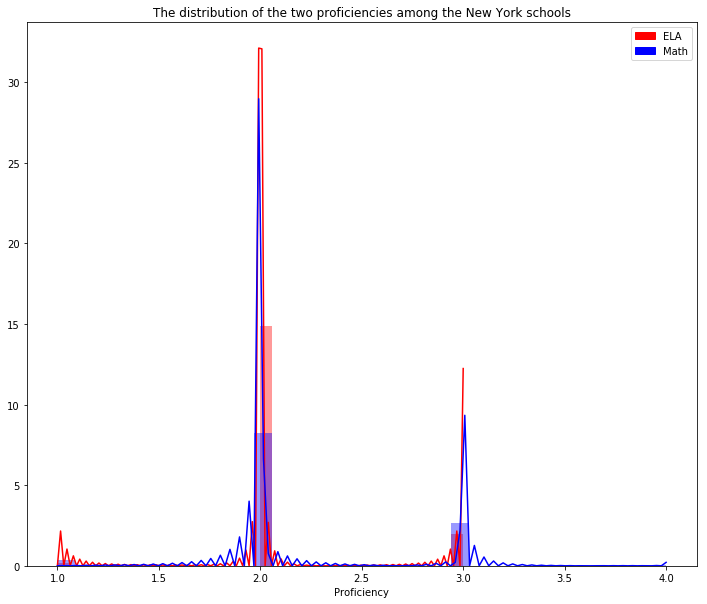

In [133]:
plt.figure(figsize=(12, 10))
sns.distplot(school_df['Average ELA Proficiency'], color = 'red')
plt.title('The distribution of the two proficiencies among the New York schools')
sns.distplot(school_df['Average Math Proficiency'], color = 'blue')
plt.xlabel('Proficiency')
ela_label = mpatches.Patch(color='red', label='ELA')
math_label = mpatches.Patch(color='blue', label='Math')

plt.legend(handles=[ela_label, math_label])
plt.show()

In [ ]:
plt.figure(figsize=(25, 10))
plt.title("Each District's proficiency")
sns.violinplot(school_df['Zip'], school_df['Average ELA Proficiency'])
plt.xticks(rotation = 90)

plt.show()

In [ ]:
plt.figure(figsize=(25, 10))
plt.title("Each District's proficiency")
sns.violinplot(school_df['Zip'], school_df['Average Math Proficiency'])
plt.xticks(rotation = 90)
plt.show()

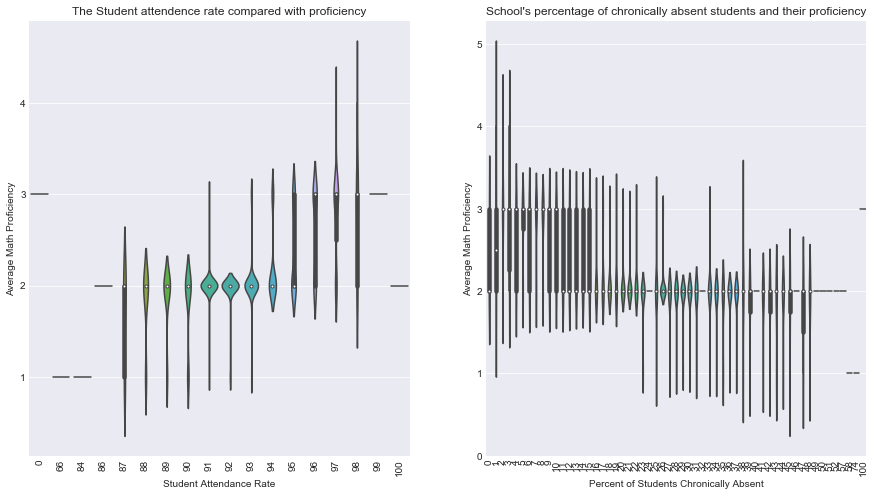

In [594]:
plt.figure(figsize=(15, 8))

plt.subplot(1,2,1)
plt.title("The Student attendence rate compared with proficiency")
sns.violinplot(school_df['Student Attendance Rate'], school_df['Average Math Proficiency'])
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
plt.title("School's percentage of chronically absent students and their proficiency")
sns.violinplot(school_df['Percent of Students Chronically Absent'], school_df['Average Math Proficiency'])
plt.xticks(rotation = 90)

plt.show()

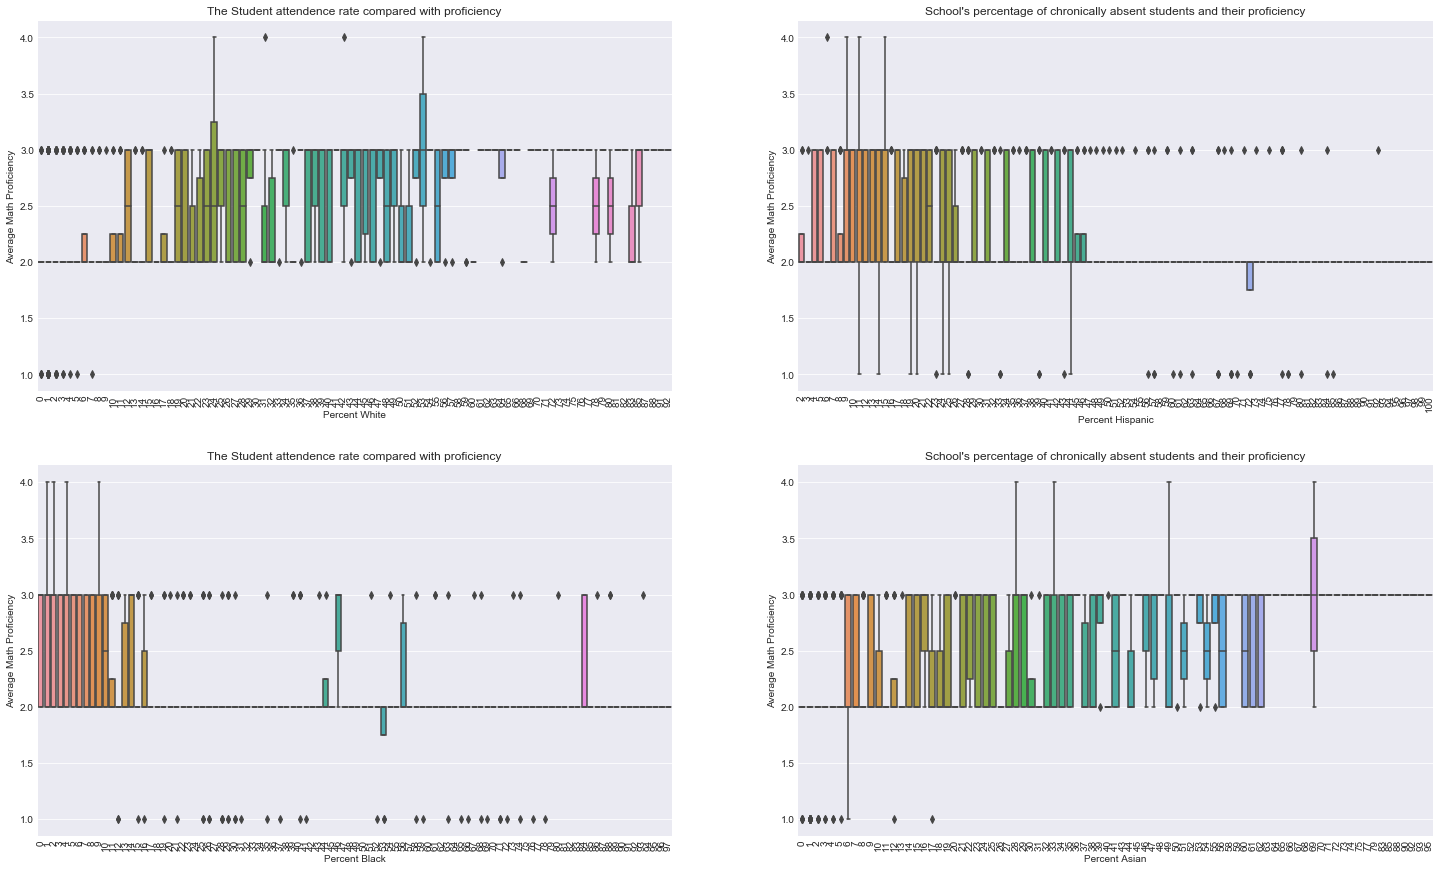

In [597]:
plt.figure(figsize=(25, 15))

plt.subplot(2,2,1)
plt.title("The Student attendence rate compared with proficiency")
sns.boxplot(school_df['Percent White'], school_df['Average Math Proficiency'])
plt.xticks(rotation = 90)

plt.subplot(2,2,2)
plt.title("School's percentage of chronically absent students and their proficiency")
sns.boxplot(school_df['Percent Hispanic'], school_df['Average Math Proficiency'])
plt.xticks(rotation = 90)

plt.subplot(2,2,3)
plt.title("The Student attendence rate compared with proficiency")
sns.boxplot(school_df['Percent Black'], school_df['Average Math Proficiency'])
plt.xticks(rotation = 90)

plt.subplot(2,2,4)
plt.title("School's percentage of chronically absent students and their proficiency")
sns.boxplot(school_df['Percent Asian'], school_df['Average Math Proficiency'])
plt.xticks(rotation = 90)

plt.show()

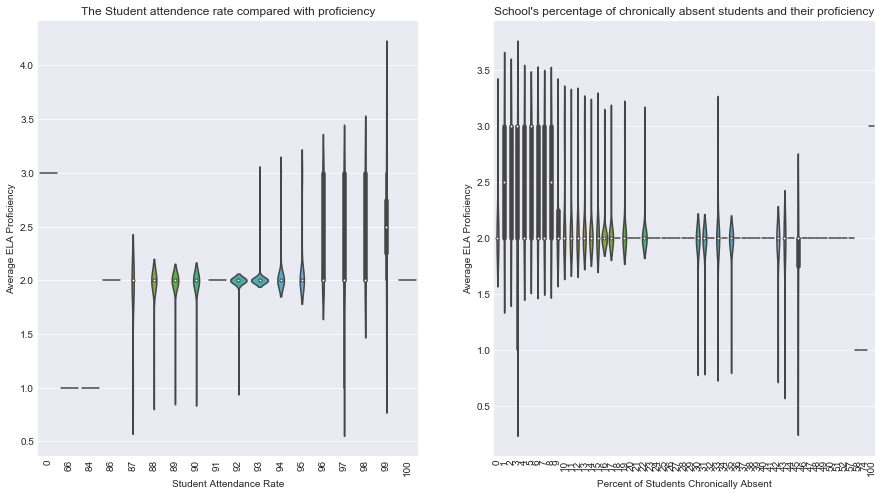

In [593]:
plt.figure(figsize=(15, 8))

plt.subplot(1,2,1)
plt.title("The Student attendence rate compared with proficiency")
sns.violinplot(school_df['Student Attendance Rate'], school_df['Average ELA Proficiency'])
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
plt.title("School's percentage of chronically absent students and their proficiency")
sns.violinplot(school_df['Percent of Students Chronically Absent'], school_df['Average ELA Proficiency'])
plt.xticks(rotation = 90)

plt.show()

In [17]:
school_df['Rigorous Instruction %'] = school_df['Rigorous Instruction %'].str.replace("%", "")
school_df['Collaborative Teachers %'] = school_df['Collaborative Teachers %'].str.replace("%", "")
school_df['Supportive Environment %'] = school_df['Supportive Environment %'].str.replace("%", "")
school_df['Effective School Leadership %'] = school_df['Effective School Leadership %'].str.replace("%", "")
school_df['Strong Family-Community Ties %'] = school_df['Strong Family-Community Ties %'].str.replace("%", "")
school_df['Effective School Leadership %'] = school_df['Effective School Leadership %'].str.replace("%", "")
school_df['Trust %'] = school_df['Trust %'].str.replace("%", "")
school_df['Student Attendance Rate'] = school_df['Student Attendance Rate'].str.replace("%", "")
school_df['Percent of Students Chronically Absent'] = school_df['Percent of Students Chronically Absent'].str.replace("%", "")
school_df['Percent ELL'] = school_df['Percent ELL'].str.replace("%", "")
school_df['Percent Asian'] = school_df['Percent Asian'].str.replace("%", "")
school_df['Percent Black'] = school_df['Percent Black'].str.replace("%", "")
school_df['Percent Hispanic'] = school_df['Percent Hispanic'].str.replace("%", "")
school_df['Percent Black / Hispanic'] = school_df['Percent Black / Hispanic'].str.replace("%", "")
school_df['Percent White'] = school_df['Percent White'].str.replace("%", "")
school_df['Community School?'] = school_df['Community School?'].str.replace("Yes", '1')
school_df['Community School?'] = school_df['Community School?'].str.replace("No", '0')
school_df['Average ELA Proficiency'] = school_df['Average ELA Proficiency'].astype(int)
school_df['Average Math Proficiency'] = school_df['Average Math Proficiency'].astype(int)
school_df['Zip'] = school_df['Zip'].astype(int)
school_df['Economic Need Index'] = school_df['Economic Need Index'].astype(int)
school_df['Rigorous Instruction %'] = school_df['Rigorous Instruction %'].astype(int)
school_df['Collaborative Teachers %'] = school_df['Collaborative Teachers %'].astype(int)
school_df['Supportive Environment %'] = school_df['Supportive Environment %'].astype(int)
school_df['Effective School Leadership %'] = school_df['Effective School Leadership %'].astype(int)
school_df['Strong Family-Community Ties %'] = school_df['Strong Family-Community Ties %'].astype(int)
school_df['Effective School Leadership %'] = school_df['Effective School Leadership %'].astype(int)
school_df['Trust %'] = school_df['Trust %'].astype(int)
school_df['Student Attendance Rate'] = school_df['Student Attendance Rate'].astype(int)
school_df['Percent of Students Chronically Absent'] = school_df['Percent of Students Chronically Absent'].astype(int)
school_df['Percent ELL'] = school_df['Percent ELL'].astype(int)
school_df['Percent Asian'] = school_df['Percent Asian'].astype(int)
school_df['Percent Black'] = school_df['Percent Black'].astype(int)
school_df['Percent Hispanic'] = school_df['Percent Hispanic'].astype(int)
school_df['Percent Black / Hispanic'] = school_df['Percent Black / Hispanic'].astype(int)
school_df['Percent White'] = school_df['Percent White'].astype(int)
school_df['Community School?'] = school_df['Community School?'].astype(int)

C:\Users\blindside\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\blindside\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\blindside\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

C:\Users\blindside\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\blindside\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\blindside\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing

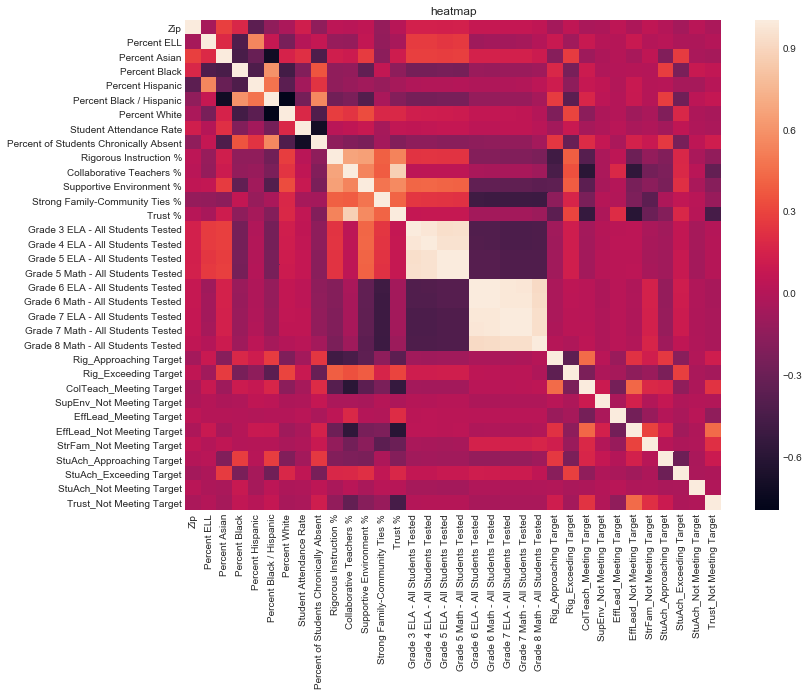

In [542]:
plt.figure(figsize=(12, 9))
sns.heatmap(X1.corr())
plt.title("heatmap")
plt.show()

In [18]:
#Making dummy variables
dummy_RigInstuctRating = pd.get_dummies(school_df['Rigorous Instruction Rating'])
dummy_ColTeachRating = pd.get_dummies(school_df['Collaborative Teachers Rating'])
dummy_SupEnvRating = pd.get_dummies(school_df['Supportive Environment Rating'])
dummy_EffLeadRating = pd.get_dummies(school_df['Effective School Leadership Rating'])
dummy_StrFamRating = pd.get_dummies(school_df['Strong Family-Community Ties Rating'])
dummy_StuAchRating = pd.get_dummies(school_df['Student Achievement Rating'])
dummy_TrustRating = pd.get_dummies(school_df['Trust Rating'])

In [19]:
school_df = pd.concat([school_df, dummy_RigInstuctRating], axis = 1)
school_df = pd.concat([school_df, dummy_ColTeachRating], axis = 1)
school_df = pd.concat([school_df, dummy_SupEnvRating], axis = 1)
school_df = pd.concat([school_df, dummy_EffLeadRating], axis = 1)
school_df = pd.concat([school_df, dummy_StrFamRating], axis = 1)
school_df = pd.concat([school_df, dummy_StuAchRating], axis = 1)
school_df = pd.concat([school_df, dummy_TrustRating], axis = 1)

In [20]:
school_df = school_df.drop(['Rigorous Instruction Rating', 'Collaborative Teachers Rating', 'Supportive Environment Rating',
                          'Effective School Leadership Rating', 'Strong Family-Community Ties Rating', 'Student Achievement Rating',
                          'Trust Rating'], 1)

In [21]:
school_df.columns = ['Zip', 'Grades', 'Community School?', 'Economic Need Index',
       'Percent ELL', 'Percent Asian', 'Percent Black', 'Percent Hispanic',
       'Percent Black / Hispanic', 'Percent White', 'Student Attendance Rate',
       'Percent of Students Chronically Absent', 'Rigorous Instruction %',
       'Collaborative Teachers %', 'Supportive Environment %',
       'Effective School Leadership %', 'Strong Family-Community Ties %',
       'Trust %', 'Average ELA Proficiency', 'Average Math Proficiency',
       'Grade 3 ELA - All Students Tested',
       'Grade 3 Math - All Students tested',
       'Grade 4 ELA - All Students Tested',
       'Grade 4 Math - All Students Tested',
       'Grade 5 ELA - All Students Tested',
       'Grade 5 Math - All Students Tested',
       'Grade 6 ELA - All Students Tested',
       'Grade 6 Math - All Students Tested',
       'Grade 7 ELA - All Students Tested',
       'Grade 7 Math - All Students Tested',
       'Grade 8 ELA - All Students Tested',
       'Grade 8 Math - All Students Tested', 'Rig_Approaching Target',
       'Rig_Exceeding Target', 'Rig_Meeting Target', 'Rig_Not Meeting Target',
       'ColTeach_Approaching Target', 'ColTeach_Exceeding Target', 'ColTeach_Meeting Target',
       'ColTeach_Not Meeting Target', 'SupEnv_Approaching Target', 'SupEnv_Exceeding Target',
       'SupEnv_Meeting Target', 'SupEnv_Not Meeting Target', 'EffLead_Approaching Target',
       'EffLead_Exceeding Target', 'EffLead_Meeting Target', 'EffLead_Not Meeting Target',
       'StrFam_Approaching Target', 'StrFam_Exceeding Target', 'StrFam_Meeting Target',
       'StrFam_Not Meeting Target', 'StuAch_Approaching Target', 'StuAch_Exceeding Target',
       'StuAch_Meeting Target', 'StuAch_Not Meeting Target', 'Trust_Approaching Target',
       'Trust_Exceeding Target', 'Trust_Meeting Target', 'Trust_Not Meeting Target']

In [22]:
school_df['Rig_Approaching Target'] = school_df['Rig_Approaching Target'].astype(int)
school_df['Rig_Exceeding Target'] = school_df['Rig_Exceeding Target'].astype(int)
school_df['Rig_Meeting Target'] = school_df['Rig_Meeting Target'].astype(int)
school_df['Rig_Not Meeting Target'] = school_df['Rig_Not Meeting Target'].astype(int)
school_df['ColTeach_Approaching Target'] = school_df['ColTeach_Approaching Target'].astype(int)
school_df['ColTeach_Exceeding Target'] = school_df['ColTeach_Exceeding Target'].astype(int)
school_df['ColTeach_Meeting Target'] = school_df['ColTeach_Approaching Target'].astype(int)
school_df['ColTeach_Not Meeting Target'] = school_df['ColTeach_Not Meeting Target'].astype(int)
school_df['SupEnv_Approaching Target'] = school_df['SupEnv_Approaching Target'].astype(int)
school_df['SupEnv_Exceeding Target'] = school_df['SupEnv_Exceeding Target'].astype(int)
school_df['SupEnv_Meeting Target'] = school_df['SupEnv_Meeting Target'].astype(int)
school_df['SupEnv_Not Meeting Target'] = school_df['SupEnv_Not Meeting Target'].astype(int)
school_df['EffLead_Approaching Target'] = school_df['EffLead_Approaching Target'].astype(int)
school_df['EffLead_Exceeding Target'] = school_df['EffLead_Exceeding Target'].astype(int)
school_df['EffLead_Meeting Target'] = school_df['EffLead_Meeting Target'].astype(int)
school_df['EffLead_Not Meeting Target'] = school_df['EffLead_Not Meeting Target'].astype(int)
school_df['StrFam_Approaching Target'] = school_df['StrFam_Approaching Target'].astype(int)
school_df['StrFam_Exceeding Target'] = school_df['StrFam_Exceeding Target'].astype(int)
school_df['StrFam_Meeting Target'] = school_df['StrFam_Meeting Target'].astype(int)
school_df['StrFam_Not Meeting Target'] = school_df['StrFam_Not Meeting Target'].astype(int)
school_df['StuAch_Approaching Target'] = school_df['StuAch_Approaching Target'].astype(int)
school_df['StuAch_Exceeding Target'] = school_df['StuAch_Exceeding Target'].astype(int)
school_df['StuAch_Meeting Target'] = school_df['StuAch_Meeting Target'].astype(int)
school_df['StuAch_Not Meeting Target'] = school_df['StuAch_Not Meeting Target'].astype(int)
school_df['Trust_Approaching Target'] = school_df['Trust_Approaching Target'].astype(int)
school_df['Trust_Exceeding Target'] = school_df['Trust_Exceeding Target'].astype(int)
school_df['Trust_Meeting Target'] = school_df['Trust_Meeting Target'].astype(int)
school_df['Trust_Not Meeting Target'] = school_df['Trust_Not Meeting Target'].astype(int)

## Random Forest default settings

In [161]:
rfr = ensemble.RandomForestClassifier()
rfr_gs = GridSearchCV(rfr, rfr_params, return_train_score=True, n_jobs =-1)
rfr_gs.fit(X,y1)

print(rfr_gs.best_params_)

{'criterion': 'mse', 'max_depth': 4, 'n_estimators': 49}


Before I started diving in and start tuning I wanted to get an idea on how well random forest would perform without any tuning or any more feature selection.

In [23]:
X = school_df.drop(['Average Math Proficiency', 'Average ELA Proficiency', 'Grades'], 1)
y = school_df['Average Math Proficiency']

In [24]:
X1 = school_df.drop(['Average Math Proficiency', 'Average ELA Proficiency', 'Grades'], 1)
y1 = school_df['Average ELA Proficiency']

In [25]:
rfc = ensemble.RandomForestClassifier()
cross_val_score(rfc, X, y, cv=4)

array([ 0.84641638,  0.86348123,  0.83848797,  0.76896552])

In [26]:
cross_val_score(rfc, X1, y1, cv=4)

array([ 0.95221843,  0.90784983,  0.86254296,  0.9       ])

In [177]:
rfc = ensemble.RandomForestRegressor()
cross_val_score(rfc, X, y, cv=5)

array([ 0.65889381,  0.30586684,  0.52717491,  0.65506117,  0.12297753])

## PCA

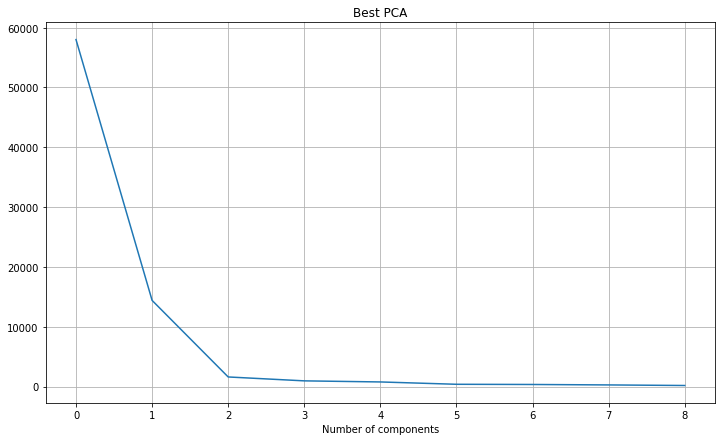

In [27]:
# Finding the best PCA component amount for the job
plt.figure(figsize=(12, 7))
pca_cnty = PCA(n_components=X.shape[1])
pca_cnty_transform = pca_cnty.fit(X)
plt.plot(pca_cnty_transform.explained_variance_[1:10])
plt.title("Best PCA")
plt.xlabel("Number of components")
plt.grid(True)
plt.show()

In [28]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X);

## Random Forest

In [336]:
rfr_params = {'n_estimators':range(1, 100,1),
         'max_depth': range(2, 20),
         'criterion': ('gini', 'entropy'),
         'max_features': ('sqrt', 'log2') }

In [339]:
rfr = ensemble.RandomForestClassifier()
rfr_gs = GridSearchCV(rfr, rfr_params, return_train_score=True, n_jobs =-1)
rfr_gs.fit(X,y)

print(rfr_gs.best_params_)

{'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 5}


In [340]:
rfr = ensemble.RandomForestClassifier(criterion= 'entropy', max_depth= 4, n_estimators= 5, max_features = 'sqrt')
cross_val_score(rfr, X, y, cv=5)

C:\Users\blindside\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


array([ 0.91025641,  0.85470085,  0.9017094 ,  0.84549356,  0.72413793])

In [344]:
rfr.fit(X,y)
importances = rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 8 (0.330165)
2. feature 7 (0.138595)
3. feature 6 (0.083380)
4. feature 9 (0.081304)
5. feature 3 (0.062852)
6. feature 26 (0.030411)
7. feature 4 (0.029243)
8. feature 17 (0.028295)
9. feature 2 (0.020661)
10. feature 49 (0.020402)
11. feature 1 (0.019918)
12. feature 10 (0.018373)
13. feature 24 (0.013841)
14. feature 19 (0.013828)
15. feature 21 (0.013761)
16. feature 5 (0.011004)
17. feature 48 (0.009521)
18. feature 29 (0.007339)
19. feature 12 (0.007337)
20. feature 44 (0.006965)
21. feature 23 (0.006774)
22. feature 22 (0.006303)
23. feature 13 (0.004750)
24. feature 37 (0.004390)
25. feature 28 (0.004076)
26. feature 45 (0.003806)
27. feature 43 (0.003324)
28. feature 11 (0.003028)
29. feature 51 (0.002857)
30. feature 33 (0.002560)
31. feature 16 (0.002438)
32. feature 40 (0.002028)
33. feature 0 (0.001930)
34. feature 55 (0.001903)
35. feature 15 (0.001332)
36. feature 25 (0.001306)
37. feature 38 (0.000000)
38. feature 53 (0.000000)
39. feature 52

In [346]:
X1 = school_df.drop(['Average Math Proficiency', 'Average ELA Proficiency', 'Grades', 'Effective School Leadership %',
                    'Grade 3 Math - All Students tested', 'Grade 4 Math - All Students Tested','Grade 8 ELA - All Students Tested',
                    'Rig_Meeting Target', 'Rig_Meeting Target', 'Rig_Not Meeting Target', 'ColTeach_Exceeding Target',
                     'SupEnv_Approaching Target', 'ColTeach_Not Meeting Target', 'EffLead_Approaching Target',
                     'EffLead_Exceeding Target', 'StrFam_Exceeding Target', 'StrFam_Meeting Target', 'StuAch_Meeting Target',
                    'Trust_Approaching Target', 'Trust_Exceeding Target'], 1)
y = school_df['Average Math Proficiency']

In [355]:
rfr_params = {'n_estimators':range(1, 100,1),
         'max_depth': range(2, 50),
         'criterion': ('gini', 'entropy'),
         'max_features': ('sqrt', 'log2') }

In [356]:
rfr = ensemble.RandomForestClassifier()
rfr_gs = GridSearchCV(rfr, rfr_params, return_train_score=True, n_jobs =-1)
rfr_gs.fit(X1,y)

print(rfr_gs.best_params_)

{'criterion': 'entropy', 'max_depth': 30, 'max_features': 'log2', 'n_estimators': 12}


In [357]:
rfr = ensemble.RandomForestClassifier(criterion= 'entropy', max_depth= 30, n_estimators= 12, max_features = 'log2')
cross_val_score(rfr, X1, y, cv=5)

C:\Users\blindside\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


array([ 0.91452991,  0.84615385,  0.85470085,  0.84978541,  0.76293103])

In [506]:
def rfr_important(x, y, model):
    model.fit(x,y)
    importances = model.feature_importances_
    std = np.std([tree.feature_importances_ for tree in rfr.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(x.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

In [361]:
X1 = school_df.drop(['Average Math Proficiency', 'Average ELA Proficiency', 'Grades', 'Effective School Leadership %',
                    'Grade 3 Math - All Students tested', 'Grade 4 Math - All Students Tested','Grade 8 ELA - All Students Tested',
                    'Rig_Meeting Target', 'Rig_Meeting Target', 'Rig_Not Meeting Target', 'ColTeach_Exceeding Target',
                     'SupEnv_Approaching Target', 'ColTeach_Not Meeting Target', 'EffLead_Approaching Target',
                     'EffLead_Exceeding Target', 'StrFam_Exceeding Target', 'StrFam_Meeting Target', 'StuAch_Meeting Target',
                    'Trust_Approaching Target', 'Trust_Exceeding Target', 'Community School?', 'ColTeach_Approaching Target',
                    'SupEnv_Meeting Target', 'StrFam_Approaching Target'], 1)

In [362]:
rfr_params = {'n_estimators':range(1, 100,1),
         'max_depth': range(2, 50),
         'criterion': ('gini', 'entropy'),
         'max_features': ('sqrt', 'log2') }

In [363]:
rfr = ensemble.RandomForestClassifier()
rfr_gs = GridSearchCV(rfr, rfr_params, return_train_score=True, n_jobs =-1)
rfr_gs.fit(X1,y)

print(rfr_gs.best_params_)

{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 16}


In [365]:
rfr = ensemble.RandomForestClassifier(criterion= 'entropy', max_depth= 7, n_estimators= 16, max_features = 'sqrt')
cross_val_score(rfr, X1, y, cv=5)

C:\Users\blindside\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


array([ 0.88461538,  0.88034188,  0.88461538,  0.83690987,  0.76293103])

In [503]:
X1.columns

Index(['Zip', 'Percent ELL', 'Percent Asian', 'Percent Black',
       'Percent Hispanic', 'Percent Black / Hispanic', 'Percent White',
       'Student Attendance Rate', 'Percent of Students Chronically Absent',
       'Rigorous Instruction %', 'Collaborative Teachers %',
       'Supportive Environment %', 'Strong Family-Community Ties %', 'Trust %',
       'Grade 3 ELA - All Students Tested',
       'Grade 4 ELA - All Students Tested',
       'Grade 5 ELA - All Students Tested',
       'Grade 5 Math - All Students Tested',
       'Grade 6 ELA - All Students Tested',
       'Grade 6 Math - All Students Tested',
       'Grade 7 ELA - All Students Tested',
       'Grade 7 Math - All Students Tested',
       'Grade 8 Math - All Students Tested', 'Rig_Approaching Target',
       'Rig_Exceeding Target', 'ColTeach_Meeting Target',
       'SupEnv_Exceeding Target', 'SupEnv_Not Meeting Target',
       'EffLead_Meeting Target', 'EffLead_Not Meeting Target',
       'StrFam_Not Meeting Target', 'S

In [368]:
rfr_important(X1, rfr)

Feature ranking:
1. feature 6 (0.141011)
2. feature 8 (0.116120)
3. feature 9 (0.115221)
4. feature 7 (0.079007)
5. feature 4 (0.055021)
6. feature 33 (0.040623)
7. feature 2 (0.039520)
8. feature 5 (0.036935)
9. feature 3 (0.027346)
10. feature 25 (0.024194)
11. feature 13 (0.024013)
12. feature 27 (0.022550)
13. feature 12 (0.021998)
14. feature 32 (0.020924)
15. feature 0 (0.020625)
16. feature 20 (0.020159)
17. feature 16 (0.019936)
18. feature 15 (0.019357)
19. feature 10 (0.019006)
20. feature 17 (0.018184)
21. feature 23 (0.017751)
22. feature 11 (0.017623)
23. feature 18 (0.016437)
24. feature 21 (0.015909)
25. feature 19 (0.013807)
26. feature 22 (0.013795)
27. feature 14 (0.012481)
28. feature 24 (0.003171)
29. feature 26 (0.002436)
30. feature 31 (0.001224)
31. feature 29 (0.001188)
32. feature 34 (0.000960)
33. feature 35 (0.000612)
34. feature 30 (0.000593)
35. feature 36 (0.000263)
36. feature 28 (0.000000)
37. feature 1 (0.000000)


In [512]:
X1 = school_df.drop(['Average Math Proficiency', 'Average ELA Proficiency', 'Grades', 'Effective School Leadership %',
                    'Grade 3 Math - All Students tested', 'Grade 4 Math - All Students Tested','Grade 8 ELA - All Students Tested',
                    'Rig_Meeting Target', 'Rig_Meeting Target', 'Rig_Not Meeting Target', 'ColTeach_Exceeding Target',
                     'SupEnv_Approaching Target', 'ColTeach_Not Meeting Target', 'EffLead_Approaching Target',
                     'EffLead_Exceeding Target', 'StrFam_Exceeding Target', 'StrFam_Meeting Target', 'StuAch_Meeting Target',
                    'Trust_Approaching Target', 'Trust_Exceeding Target', 'Community School?', 'ColTeach_Approaching Target',
                    'SupEnv_Meeting Target', 'StrFam_Approaching Target', 'Economic Need Index', 'Trust_Meeting Target', 'SupEnv_Exceeding Target'], 1)

In [513]:
rfr_params = {'n_estimators':range(1, 100,1),
         'max_depth': range(2, 50),
         'criterion': ('gini', 'entropy'),
         'max_features': ('sqrt', 'log2') }

In [514]:
rfr = ensemble.RandomForestClassifier()
rfr_gs = GridSearchCV(rfr, rfr_params, return_train_score=True, n_jobs =-1)
rfr_gs.fit(X1,y)

print(rfr_gs.best_params_)

{'criterion': 'entropy', 'max_depth': 23, 'max_features': 'log2', 'n_estimators': 49}


In [504]:
rfr = ensemble.RandomForestClassifier(criterion= 'entropy', max_depth= 38, n_estimators= 34, max_features = 'sqrt')
cross_val_score(rfr, X1, y, cv=5)

C:\Users\blindside\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


array([ 0.89316239,  0.86752137,  0.88888889,  0.83261803,  0.78017241])

In [511]:
X1.columns

Index(['Zip', 'Percent ELL', 'Percent Asian', 'Percent Black',
       'Percent Hispanic', 'Percent Black / Hispanic', 'Percent White',
       'Student Attendance Rate', 'Percent of Students Chronically Absent',
       'Rigorous Instruction %', 'Collaborative Teachers %',
       'Supportive Environment %', 'Strong Family-Community Ties %', 'Trust %',
       'Grade 3 ELA - All Students Tested',
       'Grade 4 ELA - All Students Tested',
       'Grade 5 ELA - All Students Tested',
       'Grade 5 Math - All Students Tested',
       'Grade 6 ELA - All Students Tested',
       'Grade 6 Math - All Students Tested',
       'Grade 7 ELA - All Students Tested',
       'Grade 7 Math - All Students Tested',
       'Grade 8 Math - All Students Tested', 'Rig_Approaching Target',
       'Rig_Exceeding Target', 'ColTeach_Meeting Target',
       'SupEnv_Exceeding Target', 'SupEnv_Not Meeting Target',
       'EffLead_Meeting Target', 'EffLead_Not Meeting Target',
       'StrFam_Not Meeting Target', 'S

In [507]:
rfr_important(X1, y, rfr)

Feature ranking:
1. feature 8 (0.136568)
2. feature 5 (0.132291)
3. feature 7 (0.072366)
4. feature 6 (0.066638)
5. feature 2 (0.043870)
6. feature 4 (0.043195)
7. feature 1 (0.039016)
8. feature 3 (0.034869)
9. feature 32 (0.034757)
10. feature 14 (0.031335)
11. feature 31 (0.030110)
12. feature 0 (0.026116)
13. feature 11 (0.025503)
14. feature 24 (0.024014)
15. feature 15 (0.023335)
16. feature 19 (0.021718)
17. feature 9 (0.021074)
18. feature 12 (0.020561)
19. feature 16 (0.019923)
20. feature 17 (0.019567)
21. feature 10 (0.017967)
22. feature 18 (0.017549)
23. feature 21 (0.016999)
24. feature 20 (0.015987)
25. feature 13 (0.015508)
26. feature 22 (0.015059)
27. feature 26 (0.011637)
28. feature 23 (0.005734)
29. feature 34 (0.003627)
30. feature 28 (0.003120)
31. feature 33 (0.002585)
32. feature 29 (0.002060)
33. feature 25 (0.002000)
34. feature 30 (0.001537)
35. feature 35 (0.000910)
36. feature 27 (0.000894)


In [ ]:
forest_features = pd.DataFrame()
forest_features['importance'] = rfr.feature_importances_
forest_features['features'] = X1.columns
sorted_forest = forest_features.sort_values('importance', ascending=False)

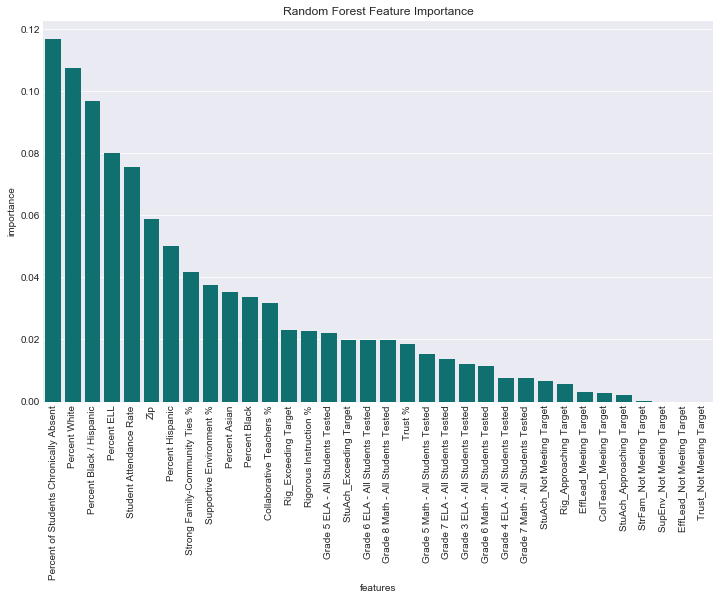

In [556]:
plt.figure(figsize=(12,7))
sns.set_style('darkgrid')
sns.barplot(x=sorted_forest['features'] , y=sorted_forest['importance'], color='teal')
plt.title('Random Forest Feature Importance')
plt.xticks(rotation=90)
plt.show()

In [531]:
X1.columns

Index(['Zip', 'Percent ELL', 'Percent Asian', 'Percent Black',
       'Percent Hispanic', 'Percent Black / Hispanic', 'Percent White',
       'Student Attendance Rate', 'Percent of Students Chronically Absent',
       'Rigorous Instruction %', 'Collaborative Teachers %',
       'Supportive Environment %', 'Strong Family-Community Ties %', 'Trust %',
       'Grade 3 ELA - All Students Tested',
       'Grade 4 ELA - All Students Tested',
       'Grade 5 ELA - All Students Tested',
       'Grade 5 Math - All Students Tested',
       'Grade 6 ELA - All Students Tested',
       'Grade 6 Math - All Students Tested',
       'Grade 7 ELA - All Students Tested',
       'Grade 7 Math - All Students Tested',
       'Grade 8 Math - All Students Tested', 'Rig_Approaching Target',
       'Rig_Exceeding Target', 'ColTeach_Meeting Target',
       'SupEnv_Not Meeting Target', 'EffLead_Meeting Target',
       'EffLead_Not Meeting Target', 'StrFam_Not Meeting Target',
       'StuAch_Approaching Target', 

#### Random Forest for  ELA

In [386]:
rfr_params = {'n_estimators':range(1, 100,1),
         'max_depth': range(2, 20),
         'criterion': ('gini', 'entropy'),
         'max_features': ('sqrt', 'log2') }

In [387]:
rfr = ensemble.RandomForestClassifier()
rfr_gs = GridSearchCV(rfr, rfr_params, return_train_score=True, n_jobs =-1)
rfr_gs.fit(X1,y1)

print(rfr_gs.best_params_)

{'criterion': 'gini', 'max_depth': 17, 'max_features': 'log2', 'n_estimators': 44}


In [532]:
rfr1 = ensemble.RandomForestClassifier(criterion= 'gini', max_depth= 17, n_estimators= 44, max_features = 'log2')
cross_val_score(rfr, X1, y1, cv=5)

array([ 0.95299145,  0.94444444,  0.9055794 ,  0.90128755,  0.89699571])

In [558]:
rfr1.fit(X1, y1)
forest_features = pd.DataFrame()
forest_features['importance'] = rfr1.feature_importances_
forest_features['features'] = X1.columns
sorted_forest = forest_features.sort_values('importance', ascending=False)

In [510]:
X1.columns

Index(['Zip', 'Percent ELL', 'Percent Asian', 'Percent Black',
       'Percent Hispanic', 'Percent Black / Hispanic', 'Percent White',
       'Student Attendance Rate', 'Percent of Students Chronically Absent',
       'Rigorous Instruction %', 'Collaborative Teachers %',
       'Supportive Environment %', 'Strong Family-Community Ties %', 'Trust %',
       'Grade 3 ELA - All Students Tested',
       'Grade 4 ELA - All Students Tested',
       'Grade 5 ELA - All Students Tested',
       'Grade 5 Math - All Students Tested',
       'Grade 6 ELA - All Students Tested',
       'Grade 6 Math - All Students Tested',
       'Grade 7 ELA - All Students Tested',
       'Grade 7 Math - All Students Tested',
       'Grade 8 Math - All Students Tested', 'Rig_Approaching Target',
       'Rig_Exceeding Target', 'ColTeach_Meeting Target',
       'SupEnv_Exceeding Target', 'SupEnv_Not Meeting Target',
       'EffLead_Meeting Target', 'EffLead_Not Meeting Target',
       'StrFam_Not Meeting Target', 'S

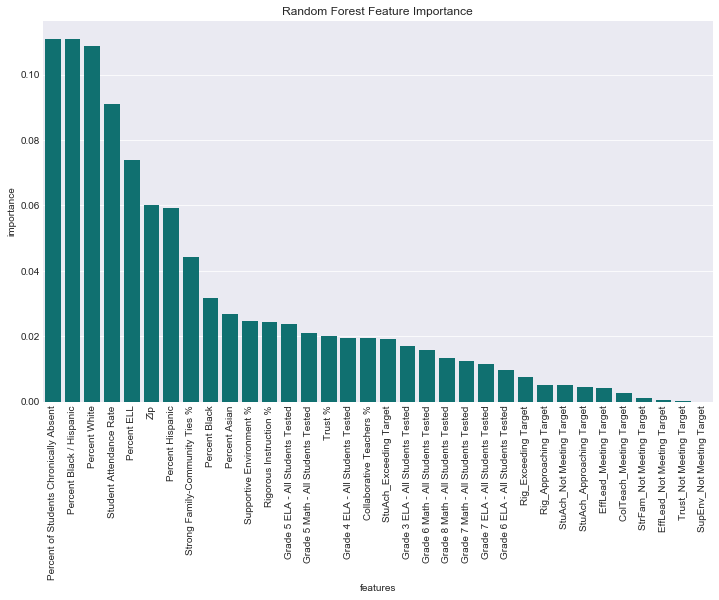

In [559]:
plt.figure(figsize=(12, 7))
sns.set_style('darkgrid')
sns.barplot(x=sorted_forest['features'] , y=sorted_forest['importance'], color='teal')
plt.title('Random Forest Feature Importance')
plt.xticks(rotation=90)
plt.show()

In [515]:
rfr_important(X1, y1, rfr)

Feature ranking:
1. feature 8 (0.116807)
2. feature 6 (0.107517)
3. feature 5 (0.096924)
4. feature 1 (0.080048)
5. feature 7 (0.075692)
6. feature 0 (0.058947)
7. feature 4 (0.050153)
8. feature 12 (0.041702)
9. feature 11 (0.037585)
10. feature 2 (0.035156)
11. feature 3 (0.033725)
12. feature 10 (0.031671)
13. feature 24 (0.023135)
14. feature 9 (0.022828)
15. feature 16 (0.022047)
16. feature 31 (0.019954)
17. feature 18 (0.019872)
18. feature 22 (0.019801)
19. feature 13 (0.018460)
20. feature 17 (0.015257)
21. feature 20 (0.013559)
22. feature 14 (0.011996)
23. feature 19 (0.011525)
24. feature 15 (0.007655)
25. feature 21 (0.007615)
26. feature 32 (0.006498)
27. feature 23 (0.005771)
28. feature 27 (0.003207)
29. feature 25 (0.002711)
30. feature 30 (0.002116)
31. feature 29 (0.000068)
32. feature 26 (0.000000)
33. feature 28 (0.000000)
34. feature 33 (0.000000)


## With PCA

In [93]:
rfr = ensemble.RandomForestClassifier()
rfr_gs = GridSearchCV(rfr, rfr_params, return_train_score=True, n_jobs =-1)
rfr_gs.fit(X_pca,y)

print(rfr_gs.best_params_)

{'criterion': 'mse', 'max_depth': 6, 'n_estimators': 12}


In [95]:
rfr = ensemble.RandomForestClassifier(criterion= 'mse',max_depth= 6, n_estimators= 12)
cross_val_score(rfr, X_pca, y, cv=4)

array([-0.02247273, -0.00490895, -0.0055996 , -0.17325328])

## KNN 

In [394]:
knn_params = {'n_neighbors':range(1, 350,1),
         'weights': ('uniform', 'distance')}

In [580]:
neighbors = KNeighborsClassifier()
gs_knn = GridSearchCV(neighbors, knn_params, return_train_score=True, n_jobs =-1)
gs_knn.fit(X1,y)

print(gs_knn.best_params_)

{'n_neighbors': 212, 'weights': 'distance'}


In [561]:
neighbors = KNeighborsClassifier(n_neighbors = 212, weights ='distance')
cross_val_score(neighbors, X1, y, cv=5)

C:\Users\blindside\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


array([ 0.72649573,  0.72649573,  0.72649573,  0.73819742,  0.73275862])

In [583]:
neighbors = KNeighborsClassifier(n_neighbors = 330, weights ='distance')
cross_val_score(neighbors, X1, y, cv=5)

C:\Users\blindside\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


array([ 0.72649573,  0.72649573,  0.72649573,  0.72961373,  0.73275862])

In [587]:
clf_ = KNeighborsClassifier()
ks = range(1, 350,1)
distance = ['uniform', 'distance']
clf = GridSearchCV(clf_,
            dict(n_neighbors = ks,
                 weights = distance),
                 cv=5,
                 pre_dispatch='1*n_jobs',
                 n_jobs=1)

clf.fit(X1, y)

scores = [X1[1] for x in clf.grid_scores_]
scores = np.array(scores).reshape(len(ks), len(distance))

for ind, i in enumerate(ks):
    plt.plot(Gammas, scores[ind], label='C: ' + str(i))
plt.legend()
plt.xlabel('Weights')
plt.ylabel('Mean score')
plt.show()

C:\Users\blindside\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\blindside\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


KeyError: 1

## With PCA

In [397]:
knn_params = {'n_neighbors':range(1, 350,1),
         'weights': ('uniform', 'distance')}

In [398]:
neighbors = KNeighborsClassifier()
gs_knn = GridSearchCV(neighbors, knn_params, return_train_score=True, n_jobs =-1)
gs_knn.fit(X_pca,y)

print(gs_knn.best_params_)

{'n_neighbors': 168, 'weights': 'uniform'}


## Graph for Math KNN tuning 

In [399]:
neighbors =KNeighborsClassifier(n_neighbors = 168, weights ='uniform')
cross_val_score(neighbors, X_pca, y, cv=5)

C:\Users\blindside\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


array([ 0.72649573,  0.72649573,  0.72649573,  0.72961373,  0.73275862])

In [575]:
def best_neigh(X1, y, max_k, weights):
    results = pd.DataFrame(columns=["neigh", "score_mean", "overfitting_range"])
    for i in range(1, max_k, 1):
        neighbors = KNeighborsClassifier(n_neighbors=i, weights = weights)
        score = cross_val_score(neighbors, X_pca, y, cv=4)
        results = pd.concat([results, pd.DataFrame({"neigh" :[i], "score_mean" : [np.mean(score)], "overfitting_range" : [max(score) - min(score)]})])    
    return results 

In [581]:
best_neigh_df = best_neigh(X_pca, y, 350, 'distance')

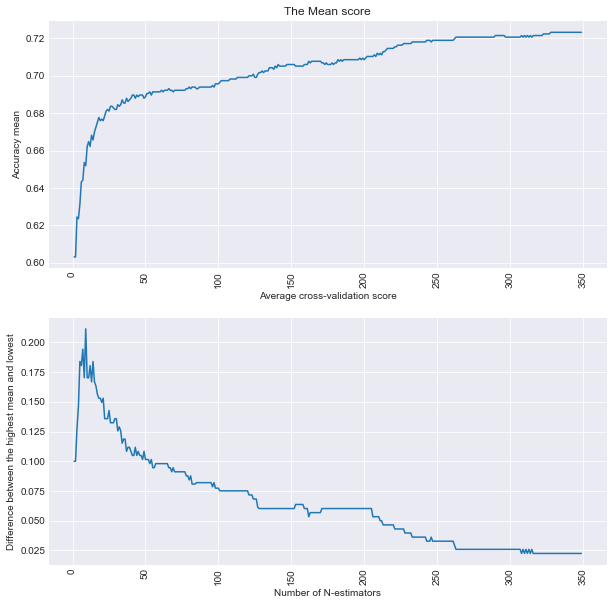

In [582]:
# These two plots are to visualize the average scores and how much overfitting happened for every n-estimator tested.
plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
plt.plot(best_neigh_df["neigh"], best_neigh_df["score_mean"])
plt.title("The Mean score")
plt.xlabel("Number of N-estimators")
plt.xlabel("Average cross-validation score")
plt.xticks(rotation = 90)
plt.ylabel("Accuracy mean")
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(best_neigh_df["neigh"], best_neigh_df["overfitting_range"])
plt.xlabel("Number of N-estimators")
plt.xticks(rotation = 90)
plt.ylabel("Difference between the highest mean and lowest")
plt.grid(True)
plt.show()

## ELA

In [400]:
knn_params = {'n_neighbors':range(1, 350,1),
         'weights': ('uniform', 'distance')}

In [402]:
neighbors = KNeighborsClassifier()
gs_knn = GridSearchCV(neighbors, knn_params, return_train_score=True, n_jobs =-1)
gs_knn.fit(X1,y1)

print(gs_knn.best_params_)

{'n_neighbors': 30, 'weights': 'distance'}


In [403]:
neighbors =KNeighborsClassifier(n_neighbors = 30, weights ='distance')
cross_val_score(neighbors, X1, y1, cv=5)

array([ 0.90598291,  0.89316239,  0.87553648,  0.87553648,  0.87553648])

In [543]:
neighbors = KNeighborsClassifier()
gs_knn = GridSearchCV(neighbors, knn_params, return_train_score=True, n_jobs =-1)
gs_knn.fit(X_pca,y1)

print(gs_knn.best_params_)

{'n_neighbors': 107, 'weights': 'distance'}


In [544]:
neighbors =KNeighborsClassifier(n_neighbors = 107, weights ='distance')
cross_val_score(neighbors, X1, y1, cv=5)

array([ 0.87606838,  0.87606838,  0.87553648,  0.87553648,  0.87553648])

## Logistic regression

In [404]:
# I am setting up to find an accurate range for alpha, I will do this in two steps to lessen the CPU load
lr_params = {'C':np.arange(0.00001, 3, .01)}

In [405]:
lr = LogisticRegression()
gs_lr = GridSearchCV(lr, lr_params, return_train_score=True, n_jobs =-1)
gs_lr.fit(X1,y)

print(gs_lr.best_params_)

{'C': 2.5200100000000001}


In [406]:
lr_params = {'C':np.arange(1, 10, .1)}

In [407]:
lr = LogisticRegression()
gs_lr = GridSearchCV(lr, lr_params, return_train_score=True, n_jobs =-1)
gs_lr.fit(X1,y)

print(gs_lr.best_params_)

{'C': 1.7000000000000006}


In [408]:
lr = LogisticRegression(C= 1.7000000000000006)
cross_val_score(lr, X1, y, cv=5)

C:\Users\blindside\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


array([ 0.90598291,  0.88034188,  0.85897436,  0.81974249,  0.74137931])

In [409]:
def printStuff(reg, x, y):
# Get results
    print('Coefficient')
    fit = reg.fit(x, y)
    coef = fit.coef_
    print(coef)
    print(fit.intercept_)

    # Get predictions
    pred_y = reg.predict(x)

    print('\nAccuracy')
    print(pd.crosstab(pred_y, y))

    scores = cross_val_score(reg, x, y, cv=5)
    print('\nPercentage accuracy')
    print(scores)
    print('Mean:', scores.mean())

In [410]:
printStuff(lr, X, y)

Coefficient
[[  6.38667042e-05   1.08687597e+00   7.73504196e-02  -8.44716632e-02
   -2.01543475e-01  -2.10999286e-01   2.43113592e-01  -8.56996336e-02
    2.61781416e-03   1.11739979e-01  -9.45552595e-02   1.22543482e-01
   -4.05069682e-02  -4.32845940e-02  -1.53573515e-01   7.59635262e-02
   -4.26430960e-01   4.15866298e-01   5.12764103e-01  -5.11784727e-01
   -1.96590355e-01   1.36359754e-01  -9.00840555e-02   7.47422093e-02
    1.30446978e-01  -1.35800280e-01   7.62927250e-03  -3.81164946e-03
    3.26535640e-01  -2.32782642e-01   7.39818176e-02  -1.67786433e-01
   -9.59942318e-02  -3.25088124e-01  -9.59942318e-02  -4.88561114e-02
   -3.25362965e-02  -2.59009474e-01   1.61640527e-01   1.29853626e-01
    4.15319821e-01   9.33764456e-02  -8.81004886e-01   3.72257002e-01
   -4.65581111e-01   1.14534562e-01   4.11298543e-01  -6.03036122e-02
    1.02911717e+00  -4.16762051e-01  -1.32443536e+00   7.12028625e-01
   -6.09096657e-03   2.64486309e-01  -2.32834508e-01  -2.56124516e-02]
 [  2.3

C:\Users\blindside\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)



Percentage accuracy
[ 0.89316239  0.86324786  0.86324786  0.81545064  0.72413793]
Mean: 0.831849338894


## Logistic regression for ELA

In [411]:
# I am setting up to find an accurate range for alpha, I will do this in two steps to lessen the CPU load
lr_params = {'C':np.arange(0.00001, 3, .01)}

In [412]:
lr = LogisticRegression()
gs_lr = GridSearchCV(lr, lr_params, return_train_score=True, n_jobs =-1)
gs_lr.fit(X1,y1)

print(gs_lr.best_params_)

{'C': 0.01001}


In [525]:
# I found the best range for this model now I want to find a more accurate number from that range
lr_params = {'C':np.arange(0.001, .1, .001)}

In [526]:
lr = LogisticRegression()
gs_lr = GridSearchCV(lr, lr_params, return_train_score=True, n_jobs =-1)
gs_lr.fit(X1,y1)

print(gs_lr.best_params_)

{'C': 0.002}


In [527]:
lr = LogisticRegression(C = 0.002)
cross_val_score(lr, X1, y1, cv=5)

array([ 0.94444444,  0.94871795,  0.91416309,  0.88841202,  0.87982833])

In [528]:
lr.fit(X1, y)
def graphit(model, x, y):
    coef_list = model.coef_.ravel().tolist()

    # Create new data frame with coefficients
    coef = pd.DataFrame(data=coef_list, columns=['coef'])

    # Add in variable names
    coef['variable'] = list(x)

    # Sort by coefficient value
    sorted_coef = coef.sort_values('coef', ascending=False)

    # Plot 
    plt.figure(figsize=(10,5))
    sns.set_style('darkgrid')
    sns.barplot(x=sorted_coef['variable'], y=sorted_coef['coef'], color='blue')
    plt.xticks(rotation=90)
    plt.ylabel('Value')
    plt.title('Logistic Regression Coefficients')

    plt.show()

In [418]:
printStuff(lr, X1, y1)

Coefficient
[[ -2.69290944e-04   8.51103249e-02  -3.97782831e-03   1.08622297e-02
    9.78238405e-04   1.26631828e-02  -4.52313103e-03  -1.28149495e-02
    5.45855050e-02  -3.08189983e-02   8.95602533e-03  -1.34794045e-02
   -7.17075665e-03   1.46302836e-02  -1.04203319e-02  -3.40410701e-02
   -1.52820614e-02  -1.55786244e-02  -1.54550432e-03   3.73660417e-03
   -2.05507492e-02  -1.99526221e-02   7.39824808e-03  -8.29151831e-04
   -1.21816144e-03  -2.04562246e-03  -3.28660004e-04  -1.09626068e-05
    3.29446199e-03  -2.94062035e-05  -6.33123456e-04   4.25074340e-03
   -8.04742274e-04   3.15690115e-03   2.48198346e-03  -6.53467971e-04]
 [  2.22186937e-04   5.13031492e-02  -2.91239259e-02   8.12187001e-03
    1.35952734e-02   1.34202562e-02  -2.29508194e-02   7.50096800e-02
    3.22623576e-02   1.03487966e-02   3.01040388e-02  -5.34096448e-02
   -6.62771593e-02  -2.90438792e-02  -3.19279949e-03   2.35488819e-03
   -1.29227315e-02   2.48427639e-02  -7.01095304e-03  -1.06739425e-03
   -6.3

## With PCA

In [419]:
# I am setting up to find an accurate range for alpha, I will do this in two steps to lessen the CPU load
lr_params = {'C':np.arange(0.00001, 3, .01)}

In [420]:
lr = LogisticRegression()
gs_lr = GridSearchCV(lr, lr_params, return_train_score=True, n_jobs =-1)
gs_lr.fit(X_pca,y)

print(gs_lr.best_params_)

{'C': 0.01001}


In [210]:
lr_params = {'C':np.arange(0.001, .1, .001)}

In [211]:
lr = LogisticRegression()
gs_lr = GridSearchCV(lr, lr_params, return_train_score=True, n_jobs =-1)
gs_lr.fit(X_pca,y)

print(gs_lr.best_params_)

{'C': 0.010000000000000002}


In [545]:
lr = LogisticRegression(C= 0.010000000000000002)
cross_val_score(lr, X_pca, y, cv=5)

C:\Users\blindside\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


array([ 0.72649573,  0.72649573,  0.72649573,  0.72961373,  0.73275862])

#### Ridge Regression 

In [421]:
lr_ridge = LogisticRegression(penalty ='l1')
lr_ridge_params = {'C':np.arange(0.00001, 3, .01)}

In [422]:
gs_lr_ridge = GridSearchCV(lr_ridge, lr_ridge_params, return_train_score=True, n_jobs =-1)
gs_lr_ridge.fit(X1,y)

print(gs_lr_ridge.best_params_)

{'C': 0.02001}


In [423]:
lr_ridge_params = {'C':np.arange(0.001, .1, .001)}

In [424]:
gs_lr_ridge = GridSearchCV(lr_ridge, lr_ridge_params, return_train_score=True, n_jobs =-1)
gs_lr_ridge.fit(X1,y)

print(gs_lr_ridge.best_params_)

{'C': 0.019000000000000003}


In [426]:
lr_ridge = LogisticRegression(C= 0.019000000000000003)
cross_val_score(lr_ridge, X1, y, cv=5)

C:\Users\blindside\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


array([ 0.90598291,  0.86752137,  0.88888889,  0.82832618,  0.74137931])

In [427]:
printStuff(lr_ridge, X1, y)

Coefficient
[[ -1.56686207e-04   7.13720082e-02  -1.80109939e-02   8.19740331e-03
   -4.11808912e-03   4.63088740e-02  -3.43686671e-02   2.69174124e-02
    1.11508420e-01  -6.32093446e-02   3.93303757e-02  -3.98847252e-02
   -6.45376900e-02  -3.14583528e-03   1.83455770e-02  -3.08485450e-02
   -4.12792845e-02  -5.65917893e-03  -1.15453314e-02  -4.10978043e-03
    3.60561894e-02  -3.29260528e-02  -5.78221678e-04   3.63997258e-02
   -1.96047218e-02  -5.06636096e-03  -1.41376436e-02   1.25065314e-02
   -4.72801461e-02   3.62681317e-02   3.23976705e-03   1.49510894e-01
   -1.81432187e-02   3.15933142e-02  -3.40508340e-02  -9.58778865e-04]
 [  2.11887455e-04   3.34977415e-02  -1.23352701e-01   3.65394275e-02
    3.80140968e-02  -1.00581049e-01  -1.08632531e-01   6.78853876e-02
    2.47847821e-02   5.28926967e-02   4.91931087e-03  -1.41542918e-02
   -6.00684563e-02   3.67651121e-03  -7.07596752e-03   9.16438625e-03
    4.41833006e-02  -4.28128287e-02   7.30602915e-02  -7.99728879e-02
   -5.7

C:\Users\blindside\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


#### RIDGE FOR ELA

In [428]:
lr_ridge = LogisticRegression(penalty ='l1')
lr_ridge_params = {'C':np.arange(0.00001, 3, .01)}

In [429]:
gs_lr_ridge = GridSearchCV(lr_ridge, lr_ridge_params, return_train_score=True, n_jobs =-1)
gs_lr_ridge.fit(X1,y1)

print(gs_lr_ridge.best_params_)

{'C': 0.10001}


In [430]:
lr_ridge_params = {'C':np.arange(0.01, 1, .001)}

In [431]:
gs_lr_ridge = GridSearchCV(lr_ridge, lr_ridge_params, return_train_score=True, n_jobs =-1)
gs_lr_ridge.fit(X1,y1)

print(gs_lr_ridge.best_params_)

{'C': 0.089999999999999927}


In [432]:
lr_ridge = LogisticRegression(C= 0.089999999999999927)
cross_val_score(lr_ridge, X1, y1, cv=5)

array([ 0.94444444,  0.94444444,  0.90987124,  0.87124464,  0.87124464])

In [433]:
printStuff(lr_ridge, X, y1)

Coefficient
[[ -9.34140487e-04   9.06065526e-02   2.03670196e-01  -9.55443374e-02
    3.88240930e-02  -2.78714958e-02   2.25672092e-02   5.48805831e-02
    5.15934742e-02   1.61013071e-01  -1.07560576e-01   3.69374348e-02
   -4.93841629e-02   4.95962770e-02  -1.75600090e-01   1.37550000e-01
    7.12426848e-03   6.87325756e-02  -8.58216843e-02  -2.89039471e-02
   -2.67111270e-02  -9.01780906e-03   2.00587284e-02  -8.39061178e-03
    6.84940274e-02  -1.29295204e-01  -1.18008322e-01   1.32455833e-01
   -5.74286006e-02  -2.56708535e-02   6.46294197e-02   1.69752760e-02
   -4.72411127e-02  -6.37011650e-02  -4.72411127e-02   5.70956154e-02
    4.19478054e-02  -1.57176692e-03  -4.13977880e-02  -4.73008951e-04
   -8.62064537e-02   1.87509185e-03   5.10509596e-02   3.17856438e-02
   -2.70702236e-02  -6.46521243e-02   1.09584257e-01  -1.93566673e-02
    9.54777400e-02  -1.78227905e-02  -1.95728033e-01   1.16578325e-01
   -1.37407922e-02   2.66269604e-02   5.33218543e-03  -1.97131120e-02]
 [  1.7

#### With PCA

In [434]:
lr_ridge = LogisticRegression(penalty ='l1')
lr_ridge_params = {'C':np.arange(0.00001, 3, .01)}

In [228]:
gs_lr_ridge = GridSearchCV(lr_ridge, lr_ridge_params, return_train_score=True, n_jobs =-1)
gs_lr_ridge.fit(X_pca ,y1)

print(gs_lr_ridge.best_params_)

{'C': 0.02001}


In [229]:
lr_ridge_params = {'C':np.arange(0.001, 1, .001)}

In [230]:
gs_lr_ridge = GridSearchCV(lr_ridge, lr_ridge_params, return_train_score=True, n_jobs =-1)
gs_lr_ridge.fit(X_pca,y1)

print(gs_lr_ridge.best_params_)

{'C': 0.012}


In [231]:
lr_ridge = LogisticRegression(C= .012)
cross_val_score(lr_ridge, X_pca, y, cv=5)

C:\Users\blindside\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


array([ 0.72649573,  0.72649573,  0.72649573,  0.72961373,  0.73275862])

#### Lasso

In [437]:
lr_lasso = LogisticRegression(penalty ='l2')
lr_lasso_params = {'C':np.arange(0.00001, 3, .01)}

In [438]:
gs_lr_lasso = GridSearchCV(lr_lasso, lr_lasso_params, return_train_score=True, n_jobs =-1)
gs_lr_lasso.fit(X1 ,y)

print(gs_lr_lasso.best_params_)

{'C': 2.5200100000000001}


In [439]:
lr_lasso_params = {'C':np.arange(1, 20, .01)}

In [440]:
gs_lr_lasso = GridSearchCV(lr_lasso, lr_lasso_params, return_train_score=True, n_jobs =-1)
gs_lr_lasso.fit(X1 ,y)

print(gs_lr_lasso.best_params_)

{'C': 3.8700000000000028}


In [441]:
lr_lasso = LogisticRegression(C= 3.8700000000000028)
cross_val_score(lr_lasso, X1, y, cv=5)

C:\Users\blindside\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


array([ 0.88888889,  0.88034188,  0.87179487,  0.83690987,  0.74568966])

In [442]:
printStuff(lr_lasso, X1, y)

Coefficient
[[  5.96947159e-07   8.75205788e-02  -1.75438584e-01  -2.53902420e-01
   -2.66352227e-01   2.31686970e-01  -8.31187411e-02   1.19352594e-02
    1.18731076e-01  -5.59462812e-02   8.21343992e-02  -5.46375889e-02
   -1.49971144e-01   1.03647022e-01   5.45583925e-02  -4.39259980e-02
   -3.50395929e-01   2.67085706e-01  -7.57881949e-02   6.46971307e-02
    1.07167389e-01  -1.10187172e-01  -7.04741122e-04   4.22117708e-01
   -6.62791818e-01  -1.86448581e-01  -9.34244170e-01   1.06174528e+00
   -1.68807833e+00   1.03689262e+00  -2.44212942e-01   2.66395090e+00
   -9.22987060e-01   3.24467323e+00   2.05445541e-02   6.09877391e-02]
 [  1.44346864e-04   3.39886016e-02  -1.52751220e-01   2.07691354e-01
    2.12974614e-01  -3.03811599e-01  -1.43604439e-01   8.18663716e-02
    2.27525612e-02   5.65487622e-02   6.05938866e-03   9.69553270e-03
   -5.54954313e-02   2.12346455e-03  -1.05660917e-02   1.10476854e-02
    5.78429401e-02  -5.45343242e-02   1.09362987e-01  -1.15014054e-01
   -6.9

C:\Users\blindside\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)



Percentage accuracy
[ 0.88888889  0.88034188  0.87179487  0.83690987  0.74568966]
Mean: 0.844725033489


#### LASSO FOR ELA

In [443]:
lr_lasso = LogisticRegression(penalty ='l2')
lr_ridge_params = {'C':np.arange(0.00001, 3, .01)}

In [444]:
gs_lr_lasso = GridSearchCV(lr_lasso, lr_lasso_params, return_train_score=True, n_jobs =-1)
gs_lr_lasso.fit(X1 ,y1)

print(gs_lr_lasso.best_params_)

{'C': 1.1000000000000001}


In [445]:
lr_lasso_params = {'C':np.arange(0.1, 10, .01)}

In [447]:
gs_lr_lasso = GridSearchCV(lr_lasso, lr_lasso_params, return_train_score=True, n_jobs =-1)
gs_lr_lasso.fit(X1 ,y)

print(gs_lr_lasso.best_params_)

{'C': 6.3199999999999967}


In [448]:
lr_lasso = LogisticRegression(C= 6.3199999999999967)
cross_val_score(lr_lasso, X1, y1, cv=5)

array([ 0.94017094,  0.94017094,  0.90128755,  0.87982833,  0.87124464])

In [449]:
printStuff(lr_lasso, X1, y1)

Coefficient
[[ -9.95879381e-04   2.79481827e-01  -1.80173745e-01   3.79611165e-02
   -5.18763163e-02   4.98191210e-03   7.60616483e-02   4.61796604e-02
    1.94489552e-01  -1.35813819e-01   4.49342501e-02  -4.56386446e-02
   -2.83989339e-01   3.11930122e-01   7.48464919e-02  -1.53557803e-01
   -1.74526162e-01   1.71979180e-01  -4.32743097e-02   4.59482539e-02
    1.49539234e-01  -2.29484390e-01   3.83040844e-02  -6.35844051e-01
   -4.02302221e-01  -6.45060327e-01  -9.50186523e-03  -4.62554442e-03
    3.60158900e-01   6.01981666e-01  -2.36317453e-01   1.09666519e+00
   -3.43650205e-01   1.77680225e+00  -4.75623458e-01  -1.93007193e-01]
 [  1.13735797e-04   5.53324228e-02  -4.99387301e-02   3.02766815e-02
    3.16755582e-02  -2.83661971e-02  -4.30593570e-02   1.21539354e-01
    5.62891756e-02   2.96394564e-02   8.42096847e-02  -6.71296164e-02
   -9.25588510e-02  -7.84683674e-02  -1.43097260e-03   2.47803688e-03
   -1.01270325e-01   1.11275345e-01   8.64551214e-03  -1.48120402e-02
   -1.9

#### With PCA

In [141]:
lr_lasso = LogisticRegression(penalty ='l1')
lr_ridge_params = {'C':np.arange(0.00001, 3, .01)}

In [142]:
gs_lr_lasso = GridSearchCV(lr_lasso, lr_lasso_params, return_train_score=True, n_jobs =-1)
gs_lr_lasso.fit(X_pca ,y1)

print(gs_lr_lasso.best_params_)

{'C': 0.10000000000000001}


In [ ]:
lr_ridge_params = {'C':np.arange(0.00001, 3, .01)}

In [ ]:
gs_lr_lasso = GridSearchCV(lr_lasso, lr_lasso_params, return_train_score=True, n_jobs =-1)
gs_lr_lasso.fit(X_pca ,y1)

print(gs_lr_lasso.best_params_)

In [143]:
lr_lasso = LogisticRegression(C= 0.10000000000000001)
cross_val_score(lr_lasso, X_pca, y, cv=4)

array([ 0.72696246,  0.72696246,  0.72852234,  0.73103448])

## SVC

In [457]:
svc_params = {'kernel': ('rbf', 'poly', 'linear', 'sigmoid'),
         'max_iter': range(1, 150)}

In [460]:
svc = SVC()
gs_svc = GridSearchCV(svc, svc_params, return_train_score=True, n_jobs =-1)
gs_svc.fit(X1,y)

print(gs_svc.best_params_)

{'kernel': 'rbf', 'max_iter': 130}


C:\Users\blindside\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=130).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [461]:
svc = SVC(kernel= 'rbf', max_iter =130)
cross_val_score(svc, X1, y, cv=5)

C:\Users\blindside\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\blindside\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=130).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\blindside\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=130).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\blindside\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=130).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, Convergen

array([ 0.66666667,  0.7008547 ,  0.77777778,  0.50214592,  0.46551724])

## SVR for ELA

In [462]:
svc_params = {'kernel': ('rbf', 'poly', 'linear', 'sigmoid'),
         'max_iter': range(1, 150)}

In [463]:
svc = SVC()
gs_svc = GridSearchCV(svc, svc_params, return_train_score=True, n_jobs =-1)
gs_svc.fit(X1,y1)

print(gs_svc.best_params_)

{'kernel': 'rbf', 'max_iter': 17}


C:\Users\blindside\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=17).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [547]:
svc = SVC(kernel= 'rbf', max_iter =17)
cross_val_score(neighbors, X1, y1, cv=5)

array([ 0.87606838,  0.87606838,  0.87553648,  0.87553648,  0.87553648])

## With PCA

In [465]:
svc = SVC()
gs_svc = GridSearchCV(svc, svc_params, return_train_score=True, n_jobs =-1)
gs_svc.fit(X_pca,y)

print(gs_svc.best_params_)

{'kernel': 'rbf', 'max_iter': 106}


C:\Users\blindside\Anaconda3\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=106).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [546]:
svc = SVC(kernel= 'rbf', max_iter =106)
cross_val_score(neighbors, X_pca, y1, cv=5)

array([ 0.81623932,  0.87606838,  0.87553648,  0.87553648,  0.87553648])

## Gradient Boosting

In [478]:
gb_params = {'n_estimators':range(1, 50,1),
         'max_depth': range(1, 10),
         'max_features': ('sqrt', 'log2')}

In [479]:
gb = ensemble.GradientBoostingClassifier()
gs = GridSearchCV(gb, gb_params, return_train_score=True, n_jobs =-1)
gs.fit(X1,y)

print(gs.best_params_)

{'max_depth': 3, 'max_features': 'log2', 'n_estimators': 31}


In [480]:
gb = ensemble.GradientBoostingClassifier(max_depth= 3, n_estimators= 31, max_features = 'log2')
cross_val_score(gb, X1, y, cv=5)

C:\Users\blindside\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


array([ 0.92307692,  0.88461538,  0.86752137,  0.85407725,  0.76293103])

In [481]:
gb_params = {'n_estimators':range(25, 50,1),
         'max_depth': range(2, 8),
         'criterion': ('friedman_mse', 'mae', 'mse'),
         'max_features': ('sqrt', 'log2')}

In [482]:
gb = ensemble.GradientBoostingClassifier()
gs1 = GridSearchCV(gb, gb_params, return_train_score=True, n_jobs =-1)
gs1.fit(X1,y)

print(gs1.best_params_)

{'criterion': 'mae', 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 30}


In [485]:
gb = ensemble.GradientBoostingClassifier(max_depth= 3, n_estimators= 30, max_features = 'log2', criterion = 'mae')
cross_val_score(gb, X1, y, cv=5)

C:\Users\blindside\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


array([ 0.89316239,  0.86752137,  0.8974359 ,  0.82403433,  0.76724138])

In [496]:
gb = ensemble.GradientBoostingClassifier(max_features ='log2', criterion ='mae')
gb_params = {'n_estimators':range(25, 75,1),
         'max_depth': range(2, 25)}

In [497]:
gs1 = GridSearchCV(gb, gb_params, return_train_score=True, n_jobs =-1)
gs1.fit(X1,y)

print(gs1.best_params_)

{'max_depth': 3, 'n_estimators': 54}


In [498]:
gb = ensemble.GradientBoostingClassifier(max_depth= 3, n_estimators= 54, max_features = 'log2', criterion = 'mae')
cross_val_score(gb, X1, y, cv=5)

C:\Users\blindside\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


array([ 0.90598291,  0.87606838,  0.88034188,  0.80686695,  0.76724138])

#### With PCA

In [82]:
gb = ensemble.GradientBoostingClassifier()
gs = GridSearchCV(gb, gb_params, return_train_score=True, n_jobs =-1)
gs.fit(X_pca,y)

print(gs.best_params_)

{'max_depth': 2, 'n_estimators': 1}


In [87]:
gb = ensemble.GradientBoostingClassifier(max_depth= 2, n_estimators= 1)
cross_val_score(gb, X_pca, y, cv=5)

array([ 0.72696246,  0.72696246,  0.72852234,  0.73103448])

## Gradient Boosting for ELA

In [486]:
gb_params = {'n_estimators':range(1, 60,1),
         'max_depth': range(2, 30),
         'max_features': ('sqrt', 'log2')}

In [487]:
gb = ensemble.GradientBoostingClassifier()
gs = GridSearchCV(gb, gb_params, return_train_score=True, n_jobs =-1)
gs.fit(X1,y1)

print(gs.best_params_)

{'max_depth': 3, 'max_features': 'log2', 'n_estimators': 37}


In [488]:
gb = ensemble.GradientBoostingClassifier(max_depth= 3, n_estimators=37, max_features = 'log2')
cross_val_score(gb, X1, y1, cv=5)

array([ 0.95726496,  0.94871795,  0.92274678,  0.91845494,  0.89699571])

In [489]:
gb_params = {'n_estimators':range(30, 90,1),
         'max_depth': range(2, 10),
         'criterion': ('friedman_mse', 'mae', 'mse'),
         'max_features': ('sqrt', 'log2')}

In [490]:
gb = ensemble.GradientBoostingClassifier()
gs = GridSearchCV(gb, gb_params, return_train_score=True, n_jobs =-1)
gs.fit(X1,y1)

print(gs.best_params_)

{'criterion': 'mse', 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 49}


In [499]:
gb = ensemble.GradientBoostingClassifier(max_depth= 3, n_estimators=49, max_features = 'log2', criterion = 'mse')
cross_val_score(gb, X1, y1, cv=5)

array([ 0.94444444,  0.95299145,  0.91416309,  0.91845494,  0.89699571])

#### With PCA

In [500]:
gb_params = {'n_estimators':range(1, 50,1),
         'max_depth': range(2, 10),
         'criterion': ('friedman_mse', 'mae', 'mse'),
         'max_features': ('sqrt', 'log2') }

In [501]:
gb = ensemble.GradientBoostingClassifier()
gs = GridSearchCV(gb, gb_params, return_train_score=True, n_jobs =-1)
gs.fit(X1,y)

print(gs.best_params_)

{'criterion': 'mse', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 7}


In [502]:
gb = ensemble.GradientBoostingClassifier(max_depth= 4, n_estimators= 7)
cross_val_score(gb, X_pca, y, cv=5)

C:\Users\blindside\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


array([ 0.72222222,  0.73076923,  0.74358974,  0.60515021,  0.69827586])